# HTMD Membrane Builder - Making membrane building easy

Molecular dynamics simulations can be used to study biological membranes or even systems of proteins embedded in membranes. Such examples include the famous GPCR proteins which are of high medical interest. Setting up a membrane simulation however can be quite challenging as they require tightly-packed pre-equilibrated membranes of different lipid compositions of different dimensions which are not always readily available.

Tools such as CHARMM-GUI already exist which provide the functionality for creating such membranes with great flexibility, they cannot however be used programmatically or in a batch manner.

HTMD provides a membrane builder tool which can be used to easily and quickly create a bilayer lipid membrane with a single command.

## Quick example

In [ ]:
from htmd.membranebuilder.build_membrane import listLipids, buildMembrane

# List all available lipids
listLipids()
# Define the dimensions of the membrane in the x and y axis in units of Angstrom
dimensions = [50, 100]
# Define the upper and lower layer lipid composition and ratio
ratioupper = {'popc': 10, 'chl1': 3}
ratiolower = {'popc': 8, 'chl1': 2}
# Build the membrane
memb = buildMembrane(dimensions, ratioupper, ratiolower)
# Visualize the membrane
memb.view()

## Detailed explanation

In [ ]:
from htmd.membranebuilder.build_membrane import listLipids, buildMembrane

MembraneBuilder provides two public functions:

 * listLipids: This function lists all lipids currently available in the lipids directory. New lipid PDB structures can be added to the listed directory and will be automatically picked up by the function.
 * buildMembrane: The main function which creates, minimizes and equilibrates the membrane.

In [ ]:
listLipids()

As you can see this function lists the location of the single-lipid PDB files used to construct the membrane as well as a lipid CSV database file which will be discussed in the next section.

To build a membrane, the user needs to specify:

 1. The dimensions of the membrane in the X and Y plane in units of Angstroms
 2. The lipid composition of the upper and lower (on the Z axis) lipid layers. The key of the dictionary is the name of the lipid and the value associated with each lipid is the relative ratio of that lipid. The ratios don't need to sum to one as shown in the example where the ratio of `popc` to `chl1` in the upper layer is ten to three.

In [ ]:
dimensions = [50, 100]
ratioupper = {'popc': 10, 'chl1': 3}
ratiolower = {'popc': 8, 'chl1': 2}

The membrane can then be built according to the specifications and viewed once completed.

In [ ]:
memb = buildMembrane(dimensions, ratioupper, ratiolower)
memb.view()

## Adding new lipids

The MembraneBuilder is fully extensible for new lipid types. What is needed is only a PDB of a single lipid oriented along the Z-axis and ideally in an extended conformation, as well as some information about it. The extended conformation of the lipids helps with the initial lipid placement to avoid clashes and will therefore produce faster better membranes. During equilibration the lipids will then have time to adopt different conformations.

As you might have noticed, `listLipids()` prints the available lipids as well as the path to a database comma-separated file. If we inspect this file we will find following contents:

```
Name,APL,Head,Thickness
popc,68.3,P,36.7
pope,58.8,P,36.7
chl1,40.0,O3,36.7
...
```

To add a new lipid to MembraneBuilder you therefore need to:
 1. make a subfolder in the folder indicated by `listLipids()` with the name of the lipid, containing one or more PDB conformations of your lipid as separate PDB files
 2. Include information about the lipid in the CSV database. The information needed is:
  1. The area-per-lipid (APL) in Angstroms
  2. The name of the lipid head atom. The head atom is necessary to a) rotate the lipid around it's head in the Z-axis to reduce clashes and b) determine the position of the lipids on the Z-axis based on the membrane thickness.
  3. The thickness of a lipid membrane of this type to determine at what negative and positize Z-axis positions to place the head of the lipid

This information can be obtained either from publications or from the CHARMM-GUI lipid library which provides a large amount of lipids in varying conformations. 
  
In the following figure you can see the extended POPC lipid oriented along the Z-axis with the tail pointing in the negative Z direction, as well as the lipid head P atom.

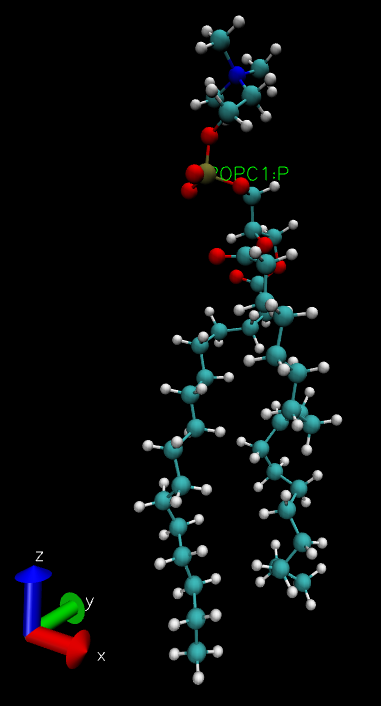